<a href="https://colab.research.google.com/github/nicholascfp/DSBD/blob/main/Notebooks/Prova1_N%C3%ADcholas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

---
# PROVA 1 - 20 PONTOS - DSBD

Neste notebook constam as 5 questões da Prova 1 da disciplina de *Data Science e Big Data*.

* As questões devem ser respondidas nos espaços já alocados para suas respectivas respostas.

* Os materiais da disciplina podem ser consultados.

* **Não é permitido qualquer tipo de interação com outros(as) colegas de sala durante a realização da prova.**

* **Você deve submeter o notebook respondido/executado no link da tarefa do Canvas até às 20:40h** *(não esqueça que o tempo de duração da prova é também um critério de avaliação!).*

*Boa Prova!*

---

---









---

#**Questão 1**

---



###**Assinale com V (*Verdadeiro*) ou F (*Falso*) cada uma das seguintes afirmações:**



(V) A ciência de dados é um campo interdisciplinar que engloba estatística, análise de dados, computação e seus métodos relacionados para entender e analisar fenômenos reais que envolvem dados.

(V) As características do Big Data podem ser descritas por meio de 5 V´s: volume, variedade, velocidade, valor e veracidade.

(F) A maior parte do Big Data é de natureza estruturada ou semiestruturada.

(V) O Big Data não pode ser analisado com eficiência usando apenas bancos de dados ou métodos tradicionais devido ao seu volume e variedade de dados.

(V) A área considerada como "perigosa" no diagrama de Venn da Ciência de Dados é aquela em que as pessoas conhecem bem o domínio de aplicação, e provavelmente dominam alguma linguagem de programação (como Pyhton) para aplicar uma regressão linear e relatar os coeficientes, mas elas não entendem o que esses coeficientes significam.

(V) Dentre as etapas do processo de Ciência de Dados podemos citar a Análise Exploratória de dados, que aplica principalmente estatística inferencial e técnicas de visualização de dados.

(V) Na etapa de modelagem de dados são aplicados e avaliados métodos de aprendizado de máquina e de aprendizado profundo.

(F) O Engenheiro de Dados usa suas habilidades ​​em matemática, estatística, ciência da computação e programação para limpar, tratar e organizar os dados para descobrir padrões “escondidos” neles; e o Cientista de Dados é responsável ​​por projetar, construir, integrar e manter dados de várias fontes.



---

#**Questão 2**

---

Nesta questão você deverá utilizar o conjunto de dados [Churn_Modelling.csv](https://raw.githubusercontent.com/malegopc/DSBD/main/Datasets/Churn/Churn_Modelling.csv) armazenado no [github da disciplina](https://github.com/malegopc/DSBD).

O conjunto de dados possui as seguintes características:

Número de Instâncias: 10.000

Número de Atributos: 13 atributos (incluindo o target)

Informações dos Atributos:

* CustomerId (identificação do cliente)
* Surname (sobrenome)
* CreditScore (pontuação de crédito)
* Geography (nacionalidade)
* Gender (sexo)
* Age (idade)
* Tenure (propriedades)
* Balance (saldo)
* NumOfProducts (número de produtos)
* HasCrCard (cartão de crédito)
* IsActiveMember (membro ativo)
* EstimatedSalary (salário estimado)
* Exited (variável de destino - target)

#Implementar os itens abaixo:



In [75]:
# Import Libraries
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
import pandas as pd
import math as math
import statistics as stats

# Read Data Files
df = pd.read_csv('/content/DSBD/Datasets/Churn/Churn_Modelling.csv')
# Eliminate null lines
df = df.dropna()
# Show Data
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


a-) Verificar se há dados vazios (null) e imprimir o tipo de cada variável/atributo.

In [76]:
# Dataset Length
print('Dataset Length:')
n = len(df)
print(n)
# Show non-null Data Numbers
print('\nData Info:\n')
df.info()
# Null Data Numbers Sum
print('\nNull Data Numbers Sum:\n')
df.isnull().sum()

Dataset Length:
10000

Data Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB

Null Data Numbers Sum:



RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

b-) Obter um resumo da estatística descritiva dos dados utilizando um único comando (função).

In [77]:
print('\nDataset Descriptive Statistics Summary:\n')
df.describe()


Dataset Descriptive Statistics Summary:



,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


c-) Calcule a proporção de clientes de sexo masculino e feminino.

In [91]:
gender = df['Gender']
df = pd.DataFrame(gender, columns = ['Gender'])

df_gender = pd.get_dummies(df['Gender'])
df_new = pd.concat([df, df_gender], axis = 1)
df_new = df.join(df_gender)
print(df_new)

female = df_new.Female.sum()
print(female)
print(n - female)

# Women Proportion
wprop = (female / n) * 100
print('\nWomen Proportion:')
print(str(round(wprop, 2)) + '%\n')

# Men Proportion
mprop= ((n - female) / n) * 100
print('Men Proportion:')
print(str(round(mprop, 2)) + '%')

      Gender  Female  Male
0     Female       1     0
1     Female       1     0
2     Female       1     0
3     Female       1     0
4     Female       1     0
...      ...     ...   ...
9995    Male       0     1
9996    Male       0     1
9997  Female       1     0
9998    Male       0     1
9999  Female       1     0

[10000 rows x 3 columns]
4543
5457

Women Proportion:
45.43%

Men Proportion:
54.57%


d-) Calcule a média das idades dos clientes.

In [96]:
# Age Mean
agemean = np.median(df['Age'])
print('\nAge Mean:')
print(agemean)

KeyError: ignored

e-) Calcule a mediana da variável "Tenure" (propriedades).

In [95]:
# Tenure Median
tenmedian = np.median(df['Tenure'])
print('\nTenure Median:')
print(tenmedian)

KeyError: ignored

f-)  Calcule o 3o. quartil da variável "NumOfProducts" (número de produtos) e explique o que esse resultado quer dizer.

In [97]:
# NumOfProducts -> Percentile 75
print('NumOfProducts -> Percentile 75')
np.percentile(df['NumOfProducts'], 75)

#Esse resultado quer dizer que 75% dos dados nesse atributo é menor ou igual ao# 
#resultado obtido!#

NumOfProducts -> Percentile 75


KeyError: ignored

g-) Calcule o percentil 10 da variável "Tenure" (propriedades) e explique o que esse resultado quer dizer.

In [ ]:
# Tenure -> Tenure 10
print('Tenure -> Tenure 10')
np.percentile(df['NumOfProducts'], 10)

#Esse resultado quer dizer que 10% dos dados nesse atributo é menor ou igual ao# 
#resultado obtido!#

h-) Qual das duas variáveis apresenta maior dispersão (variabilidade): "Tenure" (propriedades) ou "EstimatedSalary" (salário estimado). Justifique a sua resposta.

---

#**Questão 3**

---

Nesta questão você deve continuar utilizando o conjunto de dados [Churn_Modelling.csv](https://raw.githubusercontent.com/malegopc/DSBD/main/Datasets/Churn/Churn_Modelling.csv) da questão anterior.


#Implementar os itens abaixo:

a-) Mostrar os histogramas das variáveis: "Geography", "Gender" e	"Age" num mesmo quadro de plotagem (usando subplots).

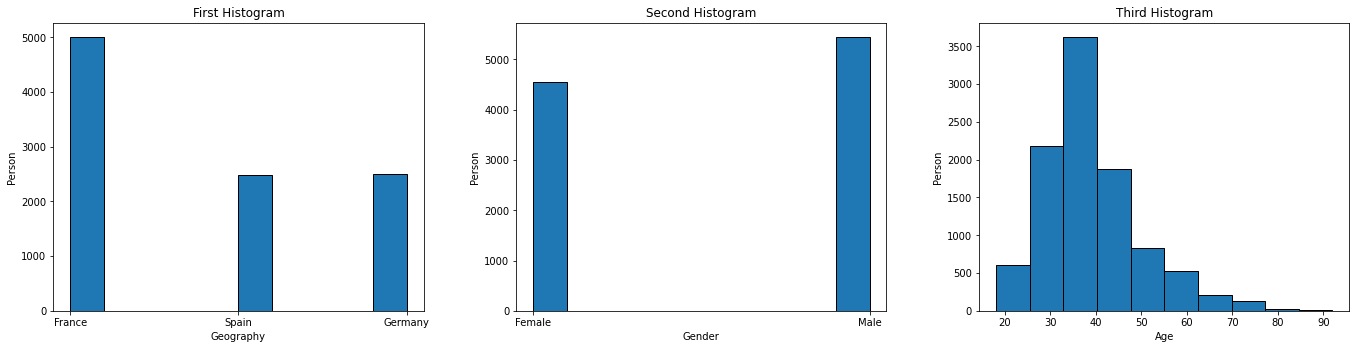

In [47]:
plt.subplot(1,3,1) 
plt.hist(df['Geography'], ec="black")
plt.xlabel('Geography')
plt.ylabel('Person')
plt.title('First Histogram')

plt.subplot(1,3,2) 
plt.hist(df['Gender'], ec="black")
plt.xlabel('Gender')
plt.ylabel('Person')
plt.title('Second Histogram')

plt.subplot(1,3,3) 
plt.hist(df['Age'], ec="black")
plt.xlabel('Age')
plt.ylabel('Person')
plt.title('Third Histogram')

plt.subplots_adjust(left   =    0,
                    bottom =    0, 
                    right  =  3.0, 
                    top    =  1.0, 
                    wspace = 0.25, 
                    hspace = 0.25)

plt.show()

b-) Mostrar os gráficos de setores (pie chart) de cada um das variáveis: "HasCrCard", "IsActiveMember" e "Geography" num mesmo quadro de plotagem (usando subplots).


In [52]:
HasCrCard_data = [df['HasCrCard'].sum(),1000 - df['HasCrCard'].sum()]
IsActiveMember_data = [df['IsActiveMember'].sum(),10000 - df['IsActiveMember'].sum()]
Geography_data = [df['Geography'].sum(),10000 - df['Geography'].sum()]
south_data = [df['south'].sum(),534 - df['south'].sum()]
manufacturing_data = [df['manufacturing'].sum(),534 - df['manufacturing'].sum()]
construction_data = [df['construction'].sum(),534 - df['construction'].sum()]
description = ['Yes','No']

plt.subplot(2,3,1) 
plt.pie(union_data, labels = description, autopct='%.2f%%', shadow = True, 
        startangle = 90)
plt.title('Union')


plt.subplots_adjust(left   =    0,
                    bottom =    0, 
                    right  =  3.0, 
                    top    =  1.0, 
                    wspace = 0.25, 
                    hspace = 0.25)

plt.show()

TypeError: ignored

c-) Mostre lado a lado os boxplots da variável "EstimatedSalary" (salário estimado) discriminados por sexo ("Gender").

d-) Análise comparativamente os boxplots do item anterior e comente as informações que podem ser exploradas. Quais conclusões podemos obter?

Resposta: 

e-) Mostre lado a lado os boxplots da variável "CreditScore" (pontuação de crédito) discriminados por nacionalidade ("Geography").

f-) Análise comparativamente os boxplots do item anterior e comente as informações que podem ser exploradas. Quais conclusões podemos obter?

Resposta: 

g-) Verifique existe alguma correlação entre as variáveis "EstimatedSalary" (salário estimado) e "NumOfProducts" (número de produtos). Justifique a sua resposta.

---

#**Questão 4**

---

O tempo de instalação de um software tem distribuição normal com média de 6 minutos e variância de 4 minutos.

#Calcule os itens abaixo:


a-) A probabilidade de que um software leve
entre 5 e 7 minutos para ser instalado.

b-) A probabilidade de que um software leve mais que 6,5 minutos para ser instalado.

c-) A probabilidade de que um software leve menos que 5 minutos para ser instalado.

---

#**Questão 5**

---

a-) Gere e imprima um conjunto de 5000 valores distribuídos normalmente com média e desvio-padrão a sua escolha. 

b-) Plote o histograma do conjunto de dados gerado no item a-).

c-) Considerando o conjunto gerado no item a-) como uma amostra de uma população, encontre uma estimativa intervalar para a média populacional com nível de confiança igual a 95%.
